In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


### Read out address data and price data from csv

In [28]:
df = pd.read_csv('./housing/USA_Housing.csv')

area_income = df.loc[:, ['Avg. Area Income']]
area_income = area_income.values
area_income = area_income[~np.isnan(area_income)]

housing_price = df.loc[:, ['Price']]
housing_price = housing_price.values
housing_price = housing_price[~np.isnan(housing_price)]

address = df.loc[:, ['Address']]
address = address.values

address = address.tolist()


### split address into city, state, and postal code

In [5]:
cities = []
states = []
postal_codes = []

for addr in address:
    addr = addr[0]
    [addr0, addr1] = addr.split('\n', 2)
#     print('#1:', addr0)
#     print('#2:', addr1)
    if addr1.find(', ') != -1 :
        [city, state_postal_code] = addr1.split(', ', 2)
        [state, postal_code] = state_postal_code.split(' ', 2)
    else:
        [city, state, postal_code] = addr1.split(' ', 3)

        
    cities.append(city)
    states.append(state)
    postal_codes.append(postal_code)
#     print('city:', city)
#     print('state:', state)
#     print('postal code:', postal_code)

### show the number of data between different states

There are  51  states.


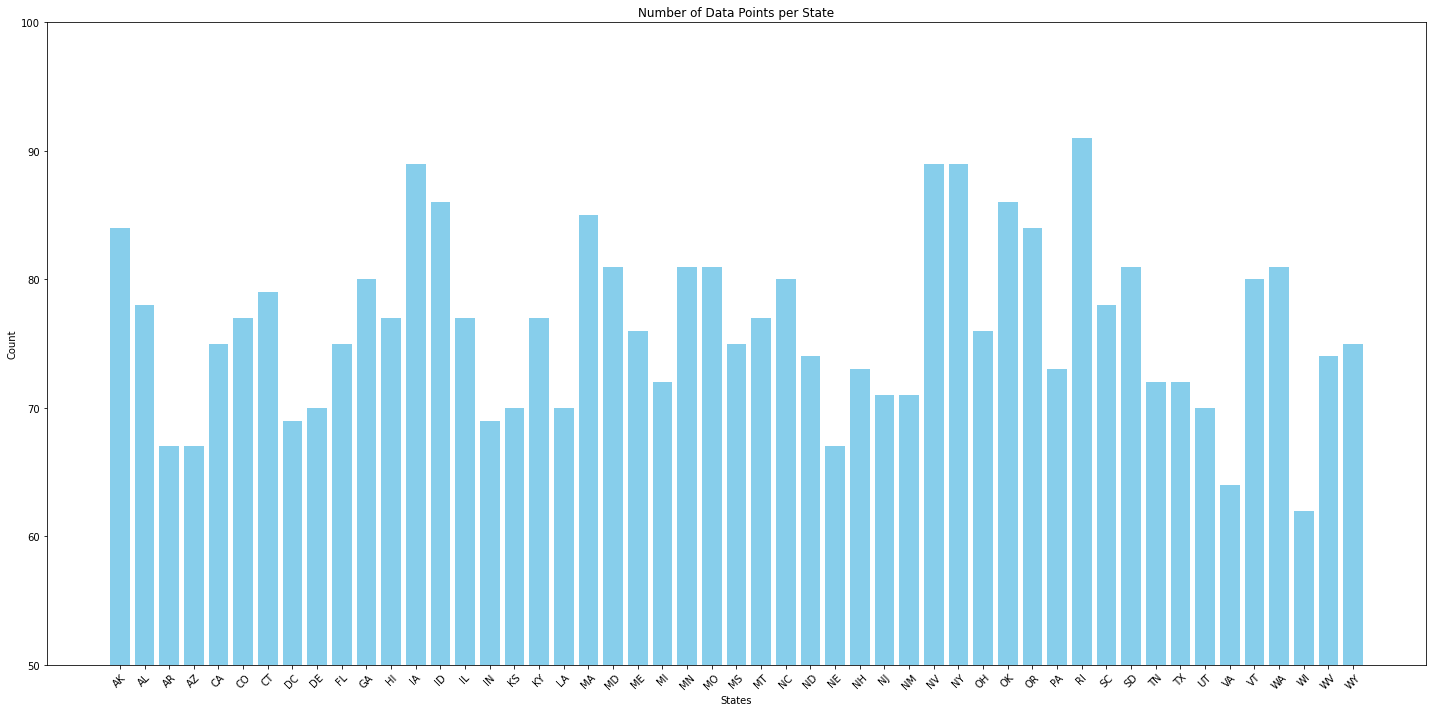

In [8]:
# States we care about
states_to_keep = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                  'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                  'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                  'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                  'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


indices_to_keep = [i for i, j in enumerate(states) if j in states_to_keep]

# Extract housing prices & income based on these indices
filtered_prices = [housing_price[idx] for idx in indices_to_keep]
filtered_income = [area_income[idx] for idx in indices_to_keep]

# Filter the states based on the states_to_keep
filtered_states = [state for state in states if state in states_to_keep]
state_counts = Counter(filtered_states)

# Extract states and their counts for plotting
state_names = list(state_counts.keys())
state_names.sort()

counts = list(state_counts.values())

print('There are ', len(state_names), ' states.')

# Plotting the histogram
plt.figure(figsize=(20, 10))
plt.bar(state_names, counts, color='skyblue')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Number of Data Points per State')
plt.xticks(rotation=45)  # Rotating stahttps://datahub.ucsd.edu/user/yoh010/notebooks/ECE225A/ECE225A/Data%20preprocessing%20for%20USA%20Housing.ipynb#te names for better readability if needed
plt.ylim([50, 100])
plt.tight_layout()
plt.show()

### Mean & Variance

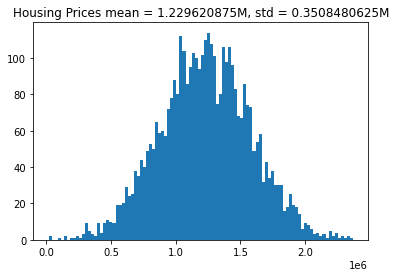

In [60]:
filtered_prices = np.array(filtered_prices, dtype=np.float32)
price_mean = np.mean(filtered_prices)
price_std = np.std(filtered_prices)
# "1 + 1 = %i" % num 
plt.title('Housing Prices mean = ' +str(price_mean/10**6) + 'M, std = ' + str(price_std/10**6) + 'M')
plt.hist(filtered_prices, bins = 100)
plt.show()

### Price Mean & Variance from different states

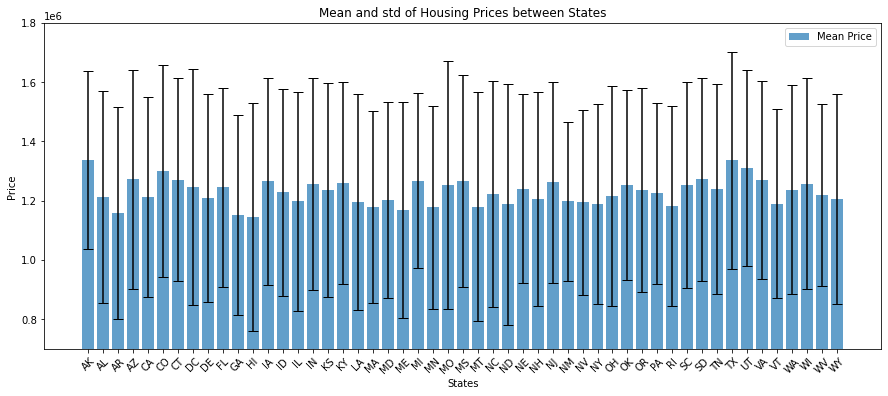

In [29]:
# Calculate mean and variance of housing prices for each state
# Create a dictionary to store prices for each state
state_price_dict = {state: [] for state in states_to_keep}



# Group prices by state
for i, state in enumerate(states):
#     print(state_price_dict[state])
    if state in states_to_keep:
        state_price_dict[state].append(housing_price[i])

# Calculate mean and variance for each state
state_means = [np.mean(prices) for state, prices in state_price_dict.items()]
state_std = [np.std(prices) for state, prices in state_price_dict.items()]

# Plotting mean and variance
plt.figure(figsize=(15, 6))

plt.bar(state_price_dict.keys(), state_means, yerr=state_std, capsize=5, alpha=0.7, label='Mean Price')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Price')
plt.title('Mean and std of Housing Prices between States')
plt.legend()
plt.ylim([0.7*10**6, 1.8*10**6])

plt.show()

(250000.0, 450000.0)

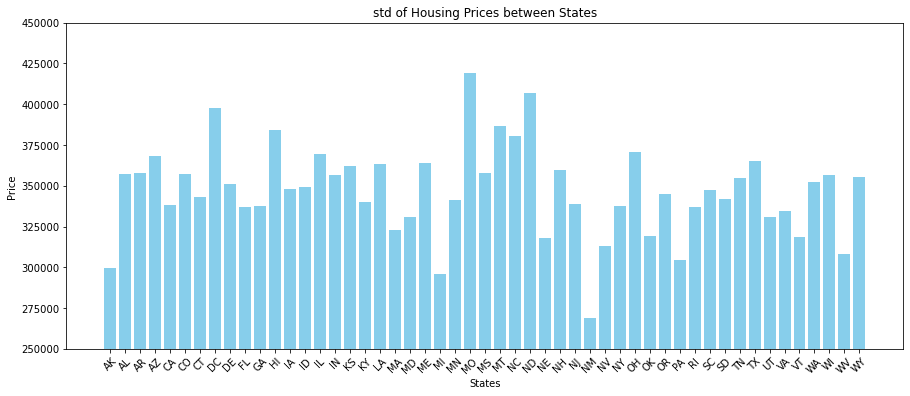

In [30]:
plt.figure(figsize=(15, 6))
plt.bar(state_names, state_std, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Price')
plt.title('std of Housing Prices between States')
plt.ylim([0.25*10**6, 0.45*10**6])

### Income Mean & Variance from different states

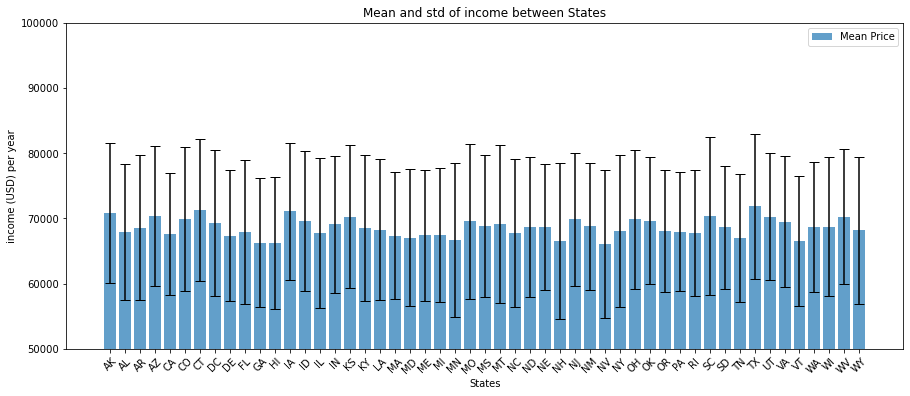

In [32]:
# Create a dictionary to store prices for each state
state_income_dict = {state: [] for state in states_to_keep}



# Group income by state
for i, state in enumerate(states):
    if state in states_to_keep:
        state_income_dict[state].append(area_income[i])

# Calculate mean and variance for each state
state_means = [np.mean(incomes) for state, incomes in state_income_dict.items()]
state_std = [np.std(incomes) for state, incomes in state_income_dict.items()]

# Plotting mean and variance
plt.figure(figsize=(15, 6))

plt.bar(state_income_dict.keys(), state_means, yerr=state_std, capsize=5, alpha=0.7, label='Mean Price')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('income (USD) per year')
plt.title('Mean and std of income between States')
plt.legend()
plt.ylim([5*10**4, 10*10**4])

plt.show()

### income v.s. price covariance / correlation coefficient

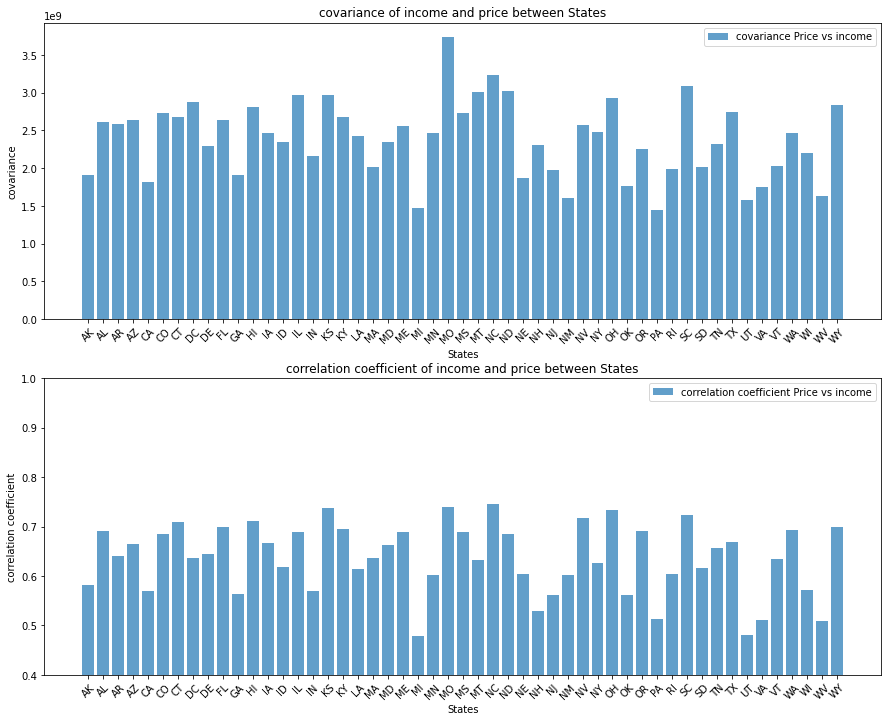

In [87]:
# Calculate correlation coefficient between wages and housing prices for each state
correlation_coefficients = {}
for state in states_to_keep:
    correlation_coefficients[state] = np.corrcoef(state_income_dict[state], state_price_dict[state])[0, 1]

# Calculate covariance between wages and housing prices for each state
covariances = {}
for state in states_to_keep:
    covariances[state] = np.cov(state_income_dict[state], state_price_dict[state])[0, 1]

# Print correlation coefficients and covariances
# for state, corr in correlation_coefficients.items():
#     print(f"State: {state}, Correlation Coefficient: {corr}")

# for state, cov in covariances.items():
#     print(f"State: {state}, Covariance: {cov}")

# Plotting covariance
plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.bar(states_to_keep, covariances.values(), capsize=5, alpha=0.7, label='covariance Price vs income')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('covariance')
plt.title('covariance of income and price between States')
plt.legend()
# Plotting correlation coefficient
plt.subplot(2, 1, 2)
plt.bar(states_to_keep, correlation_coefficients.values(), capsize=5, alpha=0.7, label='correlation coefficient Price vs income')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('correlation coefficient')
plt.title('correlation coefficient of income and price between States')
plt.legend()
plt.ylim([0.4, 1])

plt.show()

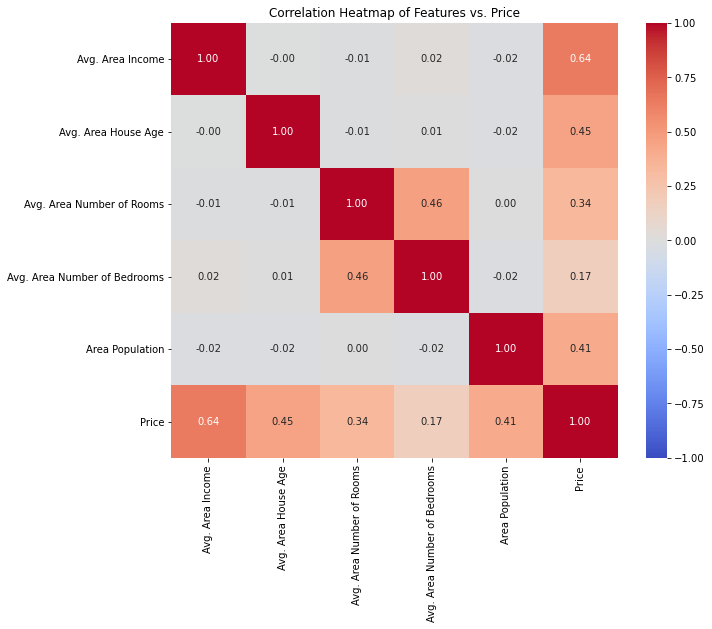

In [93]:
import seaborn as sns

df_heatmap = df.drop('Address', axis=1)
# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features vs. Price')
plt.show()